In [17]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

dat = datasets.load_iris()

iris = pd.DataFrame(dat['data'], columns=dat['feature_names'])
iris['species'] = dat['target']

In [18]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\wardy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\wardy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


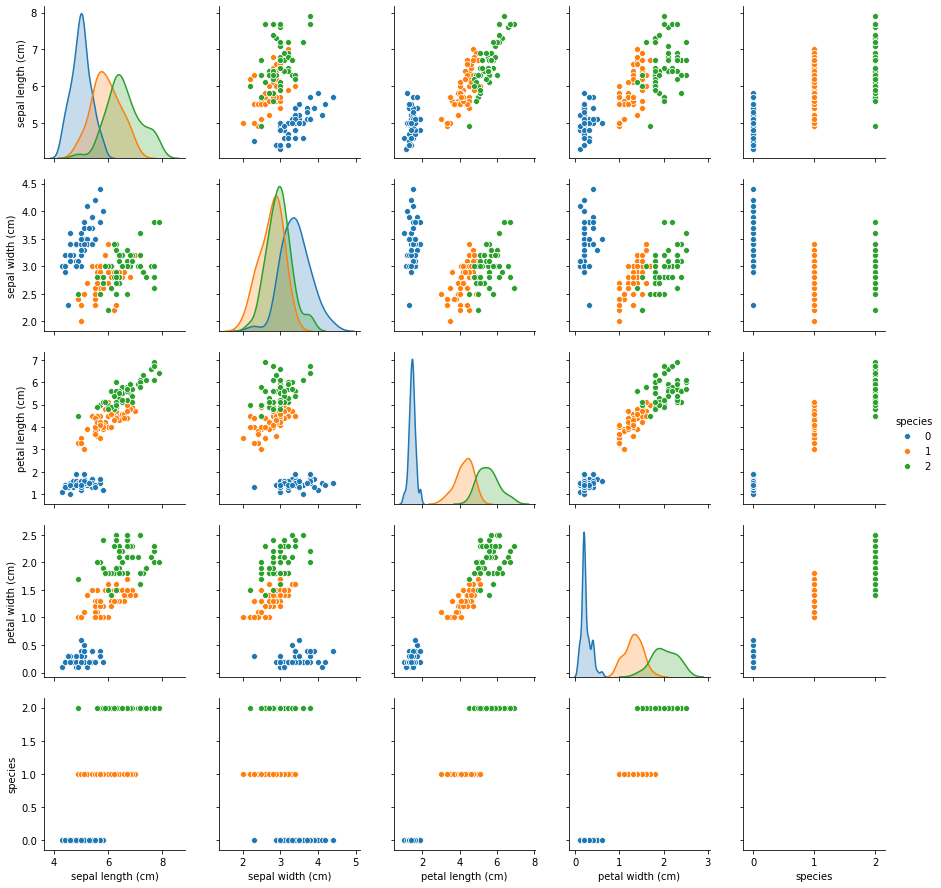

In [19]:
sns.pairplot(iris, hue='species')

In [20]:
y = iris['species']
X = iris.drop(columns='species')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [25]:
from sklearn import ensemble

clr = ensemble.RandomForestClassifier(n_estimators=1000, random_state=20)
clr.fit(X_train, y_train)

C:\Users\wardy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [35]:
probs = clr.predict_proba(X_test)

In [36]:
prob_0 = probs[:, 0]
prob_1 = probs[:, 1]
prob_2 = probs[:, 2]

In [39]:
evaluate = pd.DataFrame({
    'actual': y_test,
    'prob_0': prob_0,
    'prob_1': prob_1,
    'prob_2': prob_2,
    'predicted': clr.predict(X_test)
})

evaluate

,actual,prob_0,prob_1,prob_2,predicted
73,1,0.000,0.988,0.012,1
18,0,0.967,0.033,0.000,0
118,2,0.000,0.013,0.987,2
78,1,0.000,0.974,0.026,1
76,1,0.000,0.850,0.150,1
31,0,0.992,0.008,0.000,0
64,1,0.000,1.000,0.000,1
141,2,0.000,0.076,0.924,2
68,1,0.000,0.864,0.136,1
82,1,0.000,0.999,0.001,1
